<a href="https://colab.research.google.com/github/MATHKIMS/dongwoo_project/blob/main/220629_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%9E%A1%EC%9D%8C%EC%A0%9C%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

이미지 읽기

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'

imgR, imgC, channel = 63, 63, 3
images = []

for i in range(40):
   file = url + 'img{0:02d}.jpg'.format(i+1)    # 이미지 파일 이름을 만든다
   img = imread(file)                           # 이미지를 읽는다
   img = resize(img, (imgR,imgC, channel))      # 이미지의 크기를 변경한다
   images.append(img)                           # img에 담는다

<Figure size 432x288 with 0 Axes>

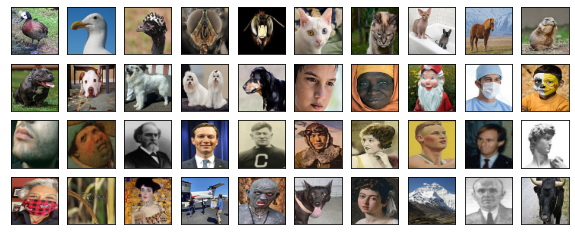

In [ ]:
def plot_images(nRow, nCol, img):
   fig = plt.figure()
   fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
   for i in range(nRow):
       for j in range(nCol):
           if nRow <= 1: axis = ax[j]
           else:         axis = ax[i, j]
           axis.get_xaxis().set_visible(False)
           axis.get_yaxis().set_visible(False)
           axis.imshow(img[i*nCol+j])

plot_images(4, 10, images)

데이터 분리(훈련용데이터,검증용 데이터)

<Figure size 432x288 with 0 Axes>

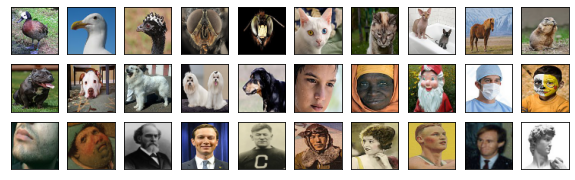

<Figure size 432x288 with 0 Axes>

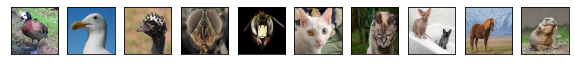

In [ ]:
X = np.array(images[:30])
X_test =np.array(images[30:])
plot_images(3, 10, X)
plot_images(1, 10, X)

입력데이터 처리

In [ ]:
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel)*0.3
X_noisy = np.clip(X_noisy, 0, 1)

X_test_noisy =  X_test \
             +  np.random.randn(len(X_test), imgR, imgC, channel)*0.3
X_test_noisy = np.clip(X_test_noisy, 0, 1)

plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

NameError: ignored

오토인코더 구성

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
enc_cnn = models.Sequential([
            layers.Conv2D(filters=16, kernel_size=3, 
                  strides=(3,3), activation='elu', input_shape=(63,63,3)),
            layers.Conv2D(filters=8, kernel_size=3, activation='elu'),
            layers.Flatten(),
            layers.Dense(1024, activation='elu')])
enc_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 8)         1160      
                                                                 
 flatten (Flatten)           (None, 2888)              0         
                                                                 
 dense (Dense)               (None, 1024)              2958336   
                                                                 
Total params: 2,959,944
Trainable params: 2,959,944
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dec_cnn = models.Sequential([
      layers.Dense(2888, input_shape=(1024, ), activation='elu'),
      layers.Reshape(target_shape=(19,19,8)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=3, kernel_size=3, strides=(3,3),
                             activation='elu')])
dec_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2888)              2960200   
                                                                 
 reshape (Reshape)           (None, 19, 19, 8)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 21, 21, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 63, 63, 3)        435       
 ranspose)                                                       
                                                                 
Total params: 2,961,803
Trainable params: 2,961,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
AE_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1024)              2959944   
                                                                 
 sequential_1 (Sequential)   (None, 63, 63, 3)         2961803   
                                                                 
Total params: 5,921,747
Trainable params: 5,921,747
Non-trainable params: 0
_________________________________________________________________


오토인코더 학습

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.2927
Epoch 2/100
1/1 [==============================] - 0s 113ms/step - loss: 0.2731
Epoch 3/100
1/1 [==============================] - 0s 112ms/step - loss: 0.4742
Epoch 4/100
1/1 [==============================] - 0s 110ms/step - loss: 0.3707
Epoch 5/100
1/1 [==============================] - 0s 123ms/step - loss: 0.2590
Epoch 6/100
1/1 [==============================] - 0s 109ms/step - loss: 0.2572
Epoch 7/100
1/1 [==============================] - 0s 112ms/step - loss: 0.2370
Epoch 8/100
1/1 [==============================] - 0s 109ms/step - loss: 0.1953
Epoch 9/100
1/1 [==============================] - 0s 110ms/step - loss: 0.1820
Epoch 10/100
1/1 [==============================] - 0s 119ms/step - loss: 0.1718
Epoch 11/100
1/1 [==============================] - 0s 118ms/step - loss: 0.1624
Epoch 12/100
1/1 [==============================] - 0s 110ms/step - loss: 0.1534
Epoch 13/100
1/1 [======================

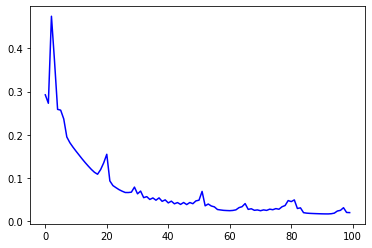

In [ ]:
history = AE_CNN.fit(X_noisy, X, epochs = 100)
plt.plot(history.history['loss'], 'b-')

훈련데이터 테스트

<Figure size 432x288 with 0 Axes>

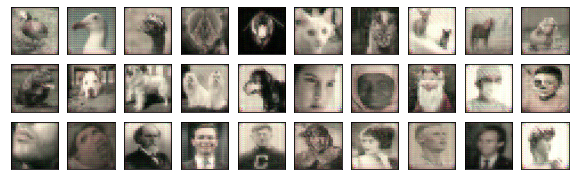

In [ ]:
denoised_result = AE_CNN.predict(X_noisy)
denoised_result = np.clip(denoised_result, 0,1)
plot_images(3, 10, denoised_result)

<Figure size 432x288 with 0 Axes>

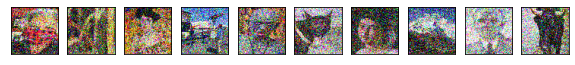

<Figure size 432x288 with 0 Axes>

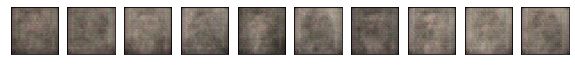

In [ ]:
denoised_result = AE_CNN.predict(X_test_noisy)
denoised_result = np.clip(denoised_result, 0,1)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised_result)

데이터 증강해보기

In [ ]:
### Label Augmentation ####
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=360,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

In [ ]:
y_aug = X.reshape(-1, imgR, imgC, channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

In [ ]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.3

In [ ]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.3

n_augmentation = 400
for _ in range(n_augmentation):
   new_y = it.next()
   new_X = new_y + np.random.randn(nData, imgR, imgC, channel)*0.3
   y_aug = np.append(y_aug, new_y, axis=0)   
   X_aug = np.append(X_aug, new_X, axis=0)

y_aug = y_aug.reshape(-1, imgR, imgC, channel)
X_aug = X_aug.reshape(-1, imgR, imgC, channel)
print(y_aug.shape)

(12030, 63, 63, 3)


<Figure size 432x288 with 0 Axes>

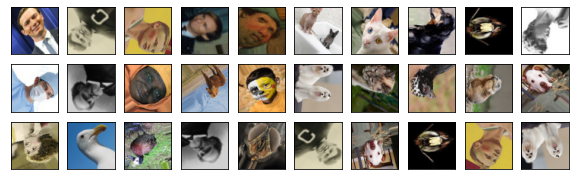

<Figure size 432x288 with 0 Axes>

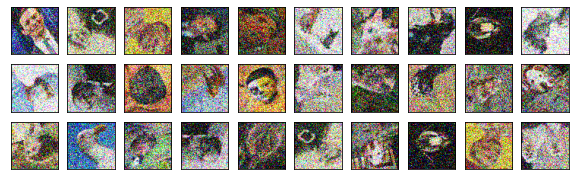

In [ ]:
y_aug = np.clip(y_aug, 0, 1)
X_aug = np.clip(X_aug, 0, 1)
start_idx = 157
plot_images(3, 10, y_aug[start_idx: start_idx+30])
plot_images(3, 10, X_aug[start_idx: start_idx+30])

증강데이터로 학습

Epoch 1/50
376/376 [==============================] - 44s 116ms/step - loss: 0.0323
Epoch 2/50
376/376 [==============================] - 43s 115ms/step - loss: 0.0168
Epoch 3/50
376/376 [==============================] - 43s 114ms/step - loss: 0.0126
Epoch 4/50
376/376 [==============================] - 42s 113ms/step - loss: 0.0107
Epoch 5/50
376/376 [==============================] - 43s 115ms/step - loss: 0.0097
Epoch 6/50
376/376 [==============================] - 43s 115ms/step - loss: 0.0090
Epoch 7/50
376/376 [==============================] - 43s 114ms/step - loss: 0.0085
Epoch 8/50
376/376 [==============================] - 43s 114ms/step - loss: 0.0081
Epoch 9/50
376/376 [==============================] - 43s 114ms/step - loss: 0.0077
Epoch 10/50
376/376 [==============================] - 43s 114ms/step - loss: 0.0074
Epoch 11/50
376/376 [==============================] - 44s 116ms/step - loss: 0.0072
Epoch 12/50
376/376 [==============================] - 46s 122ms/step - lo

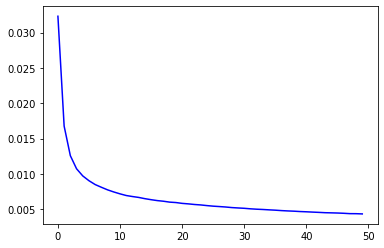

In [ ]:
history = AE_CNN.fit(X_aug, y_aug, epochs = 50)
plt.plot(history.history['loss'], 'b-')


<Figure size 432x288 with 0 Axes>

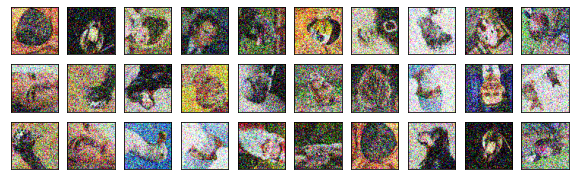

<Figure size 432x288 with 0 Axes>

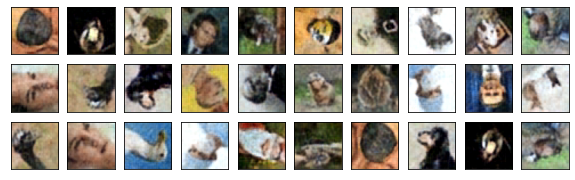

In [ ]:
denoised_result = AE_CNN.predict(X_aug)
denoised_result = np.clip(denoised_result, 0, 1)
plot_images(3, 10, X_aug[100:130])
plot_images(3, 10, denoised_result[100:130])

<Figure size 432x288 with 0 Axes>

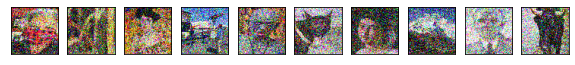

<Figure size 432x288 with 0 Axes>

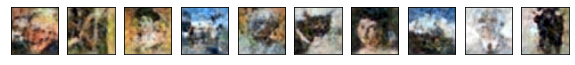

In [ ]:
denoised_result = AE_CNN.predict(X_test_noisy)
denoised_result = np.clip(denoised_result, 0, 1)
plot_images(1, 10, X_test_noisy)
plot_images(1, 10, denoised_result)